# Examples of XAI-Lib Usage for IMAGENET

In [ ]:
!git clone https://github.com/francescanaretto/XAI-course_2021.git

In [ ]:
cd XAI-course_2021/Images/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
assert tf.__version__[0]=='2', 'please install tensorflow 2.x'
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
imagenet_x_data = pickle.load(open('./datasets/imagenet.p','rb'))
imagenet_y_data = pickle.load(open('./datasets/imagenet_labels.p','rb'))
imagenet_map = pickle.load(open('./datasets/imagenet_mapping_labels.p','rb'))

# Load Model
imagenet_VGG = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=True,weights='imagenet')
imagenet_VGG.trainable = False
imagenet_VGG.summary()

2022-01-05 16:48:22.427131: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
pred = np.argmax(imagenet_VGG(imagenet_x_data[0,:].reshape(1,224,224,3)).numpy())
pred

716

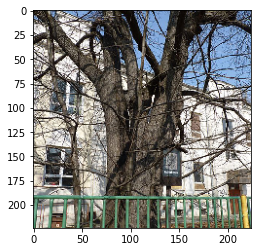

In [4]:
plt.imshow(imagenet_x_data[0,:].astype(int))

In [5]:
imagenet_map['716']

['n03930313', 'picket_fence']

## Intgrad

<img src='./images/intgrad_imagenet.jpg' width="25%" height="25%">

# RISE

<img src='./images/rise_imagenet.jpg' width="50%" height="50%">

# GradCAM

<img src='./images/gradcam_imagenet.png' width="50%" height="50%">

# GradCAM++

<img src='./images/gradcampp_imagenet.png' width="50%" height="50%">

## LIME

<img src='./images/lime_imagenet.jpg' width="50%" height="50%">

# ILORE

<img src='./images/lore_imagenet.jpg' width="50%" height="50%">

# Metrics

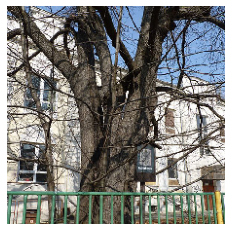

In [23]:
img = imagenet_x_data[0:1,:]
plt.imshow(img[0]/255,cmap='gray')
plt.axis('off');

In [24]:
def channel_conversion(image):
    if image.shape[-1]==3:
        image = np.stack((image[:,:,:,0],image[:,:,:,1],image[:,:,:,2]),axis=1)
    else:
        image = np.stack((image[:,0,:,:],image[:,1,:,:],image[:,2,:,:]),axis=-1)
    return image